In [49]:
##IMPORTING LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [52]:
## LOAD AND CLEAN THE DATA

df = pd.read_csv('D:\\Downloads\\Supermart_Grocery_Sales.csv')

# Clean column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Convert order_date to datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce', dayfirst=True)

# Extract time-based features
df['order_month'] = df['order_date'].dt.to_period('M')
df['order_year'] = df['order_date'].dt.year
df['order_day'] = df['order_date'].dt.day_name()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       9994 non-null   object        
 1   customer_name  9994 non-null   object        
 2   category       9994 non-null   object        
 3   sub_category   9994 non-null   object        
 4   city           9994 non-null   object        
 5   order_date     4042 non-null   datetime64[ns]
 6   region         9994 non-null   object        
 7   sales          9994 non-null   int64         
 8   discount       9994 non-null   float64       
 9   profit         9994 non-null   float64       
 10  state          9994 non-null   object        
 11  order_month    4042 non-null   period[M]     
 12  order_year     4042 non-null   float64       
 13  order_day      4042 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(8), period[M](1)
memo

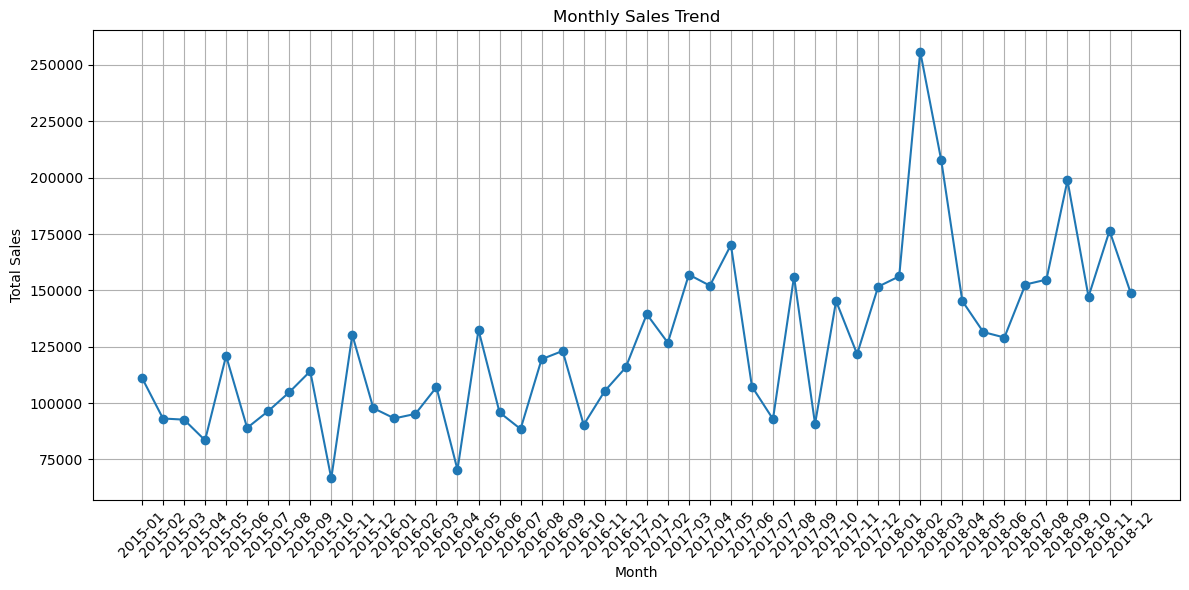

In [53]:
##Monthly Sales Trend

monthly_sales = df.groupby('order_month')['sales'].sum().reset_index()
monthly_sales['order_month'] = monthly_sales['order_month'].astype(str)

plt.figure(figsize=(12,6))
plt.plot(monthly_sales['order_month'], monthly_sales['sales'], marker='o', linestyle='-')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


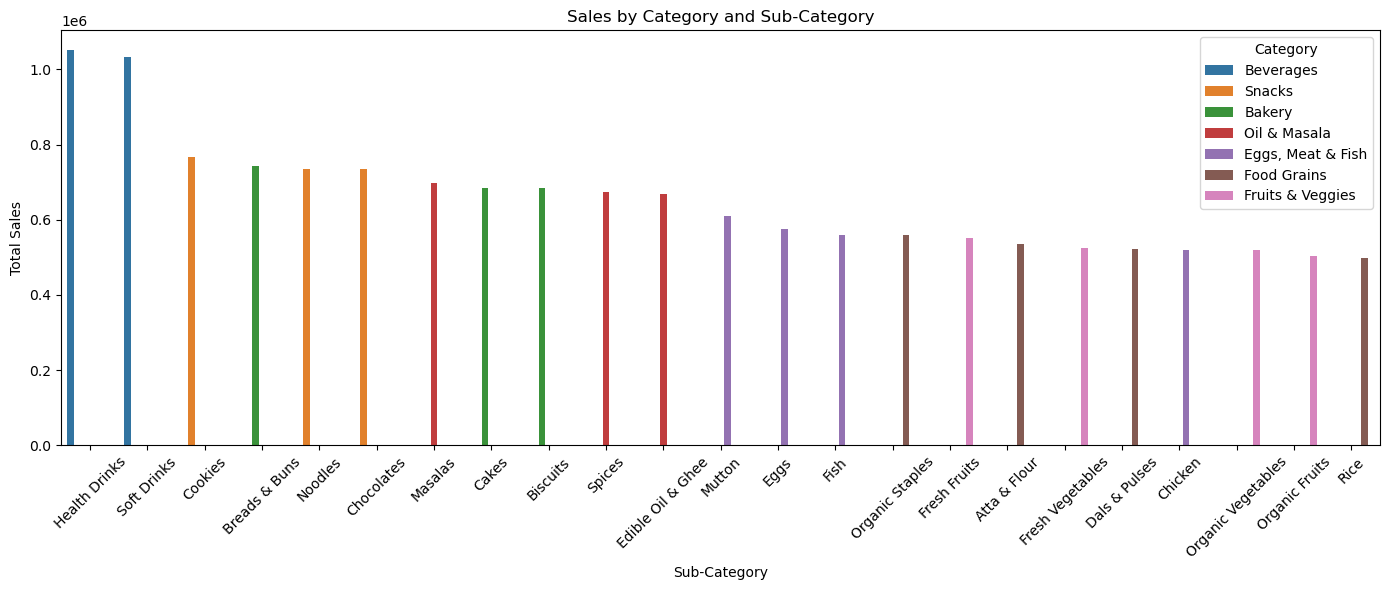

In [54]:
##Category & Sub-Category Performance

category_perf = df.groupby(['category', 'sub_category'])[['sales', 'profit']].sum().reset_index()
category_perf = category_perf.sort_values('sales', ascending=False)

plt.figure(figsize=(14,6))
sns.barplot(data=category_perf, x='sub_category', y='sales', hue='category')
plt.title('Sales by Category and Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.tight_layout()
plt.show()


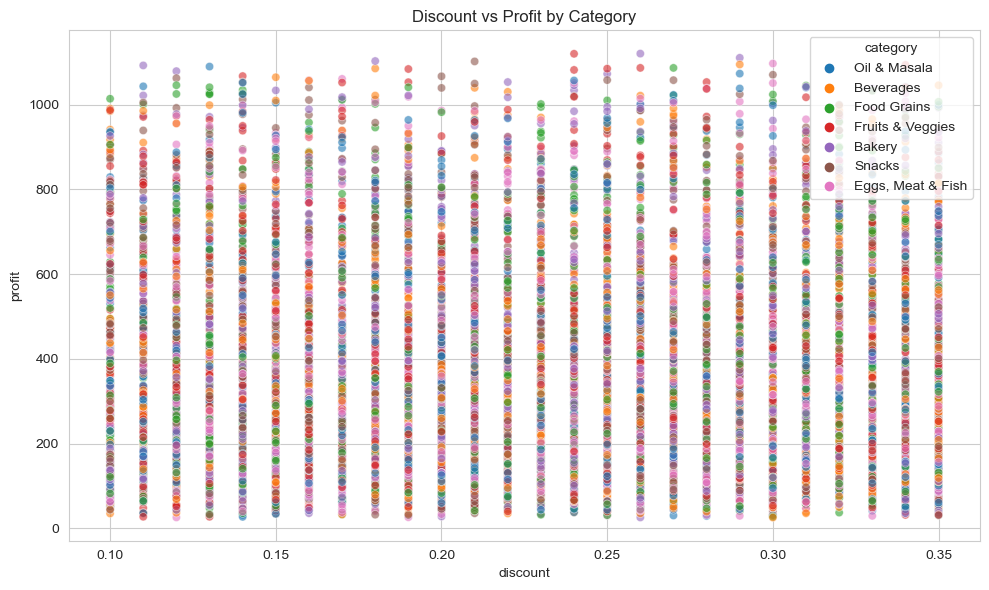

In [55]:
##Discount vs Profit Scatter Plot

plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.scatterplot(data=df, x='discount', y='profit', hue='category', alpha=0.6)
plt.title('Discount vs Profit by Category')
plt.tight_layout()
plt.show()

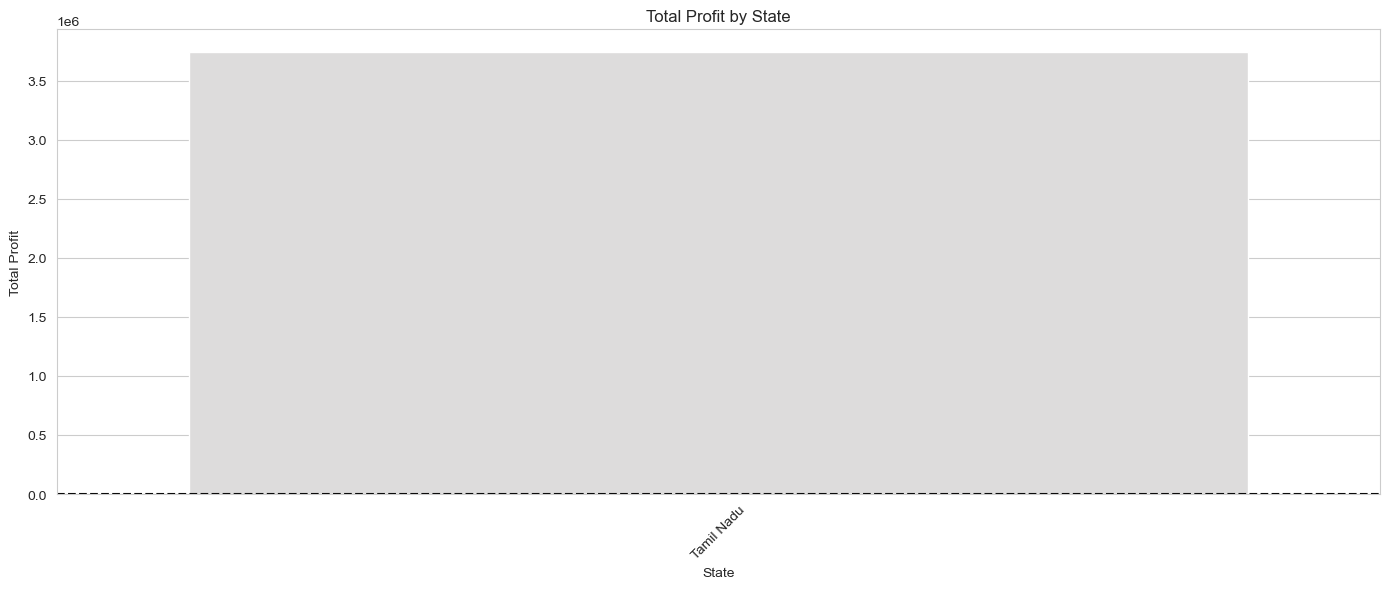

In [56]:
##Profit by State
state_profit = df.groupby('state')['profit'].sum().reset_index()
state_profit = state_profit.sort_values(by='profit', ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(data=state_profit, x='state', y='profit', palette='coolwarm')
plt.title('Total Profit by State')
plt.xticks(rotation=45)
plt.xlabel('State')
plt.ylabel('Total Profit')
plt.axhline(0, color='black', linestyle='--')  # zero-profit line
plt.tight_layout()
plt.show()
